In [15]:
%autosave 0
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential      # class
from tensorflow.keras.models import load_model      # model 사용
from tensorflow.keras.layers import Dense           # 전결합
from tensorflow.keras.callbacks import EarlyStopping # 학습 자동 중지
from tensorflow.keras import regularizers

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold  # K 겹 교차 검증

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
# windows 10
# font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgunsl.ttf").get_name()
rc('font', family=font_name)           # 맑은 고딕 폰트 지정
plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

# Jupyter에게 matplotlib 그래프를 출력 영역에 표시할 것을 지시하는 명령
%matplotlib inline  

Autosave disabled


In [17]:
data_set = np.loadtxt('./CancerSurvival_1.csv', delimiter=',')
print(type(data_set))
print(data_set.shape)

<class 'numpy.ndarray'>
(470, 18)


In [18]:
X = data_set[:, 0:17].astype(float)  # <class 'float'> --> <class 'numpy.float64'>
Y = data_set[:, 17]
print(X.shape)
print(Y.shape)

(470, 17)
(470,)


In [19]:
# train_test_split 분할을 통한 훈련, 검증, 테스트 데이터의 분리
# stratify=Y: 0, 1을 동일한 비율로 섞어서 할당.
seed = 0
# 90%: 분할대기, 10%: 테스트 47건
x_train_all, x_test, y_train_all, y_test = train_test_split(X, Y,
                                                            stratify=Y,
                                                            test_size=0.10,
                                                            random_state=seed)
# 나머지 데이터 90%를 분할, 80%: 훈련, 20%: 검증
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all,
                                                  stratify=y_train_all,
                                                  test_size=0.1,
                                                  random_state=seed)

print(y_val)
print(y_val.shape)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(43,)


In [20]:
model = Sequential()

model.add(Dense(128, input_shape=(17, ), activation='relu')) # 출력: 128
model.add(Dense(64, activation='relu')) 
model.add(Dense(32, activation='relu')) 
model.add(Dense(15, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) # 입력: 15, 출력: 1

# 손실값: 0.6069456588291062 /정확도: 78.72340679168701 %
# model.add(Dense(64, input_shape=(17, ), activation='relu')) # 출력: 128
# model.add(Dense(32, activation='relu')) 
# model.add(Dense(15, activation='relu')) 
# model.add(Dense(1, activation='sigmoid')) # 입력: 15, 출력: 1

model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=['accuracy'])

# 최소 손실값이 20번 등장하면 학습 중지
early_stopping = EarlyStopping(monitor='loss', patience=20)

hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=1000, 
                 batch_size=2,
                 callbacks=[early_stopping])

Train on 380 samples, validate on 43 samples
Epoch 1/1000
380/380 [==============================] - 1s 3ms/sample - loss: 0.6063 - accuracy: 0.8105 - val_loss: 0.4367 - val_accuracy: 0.8605
Epoch 2/1000
380/380 [==============================] - 0s 705us/sample - loss: 0.4703 - accuracy: 0.8500 - val_loss: 0.4437 - val_accuracy: 0.8605
Epoch 3/1000
380/380 [==============================] - 0s 690us/sample - loss: 0.4538 - accuracy: 0.8500 - val_loss: 0.4152 - val_accuracy: 0.8605
Epoch 4/1000
380/380 [==============================] - 0s 695us/sample - loss: 0.4460 - accuracy: 0.8500 - val_loss: 0.4446 - val_accuracy: 0.8605
Epoch 5/1000
380/380 [==============================] - 0s 687us/sample - loss: 0.4463 - accuracy: 0.8500 - val_loss: 0.4424 - val_accuracy: 0.8605
Epoch 6/1000
380/380 [==============================] - 0s 671us/sample - loss: 0.4432 - accuracy: 0.8500 - val_loss: 0.4380 - val_accuracy: 0.8605
Epoch 7/1000
380/380 [==============================] - 0s 724us/samp

Epoch 56/1000
380/380 [==============================] - 0s 701us/sample - loss: 0.4115 - accuracy: 0.8500 - val_loss: 0.4282 - val_accuracy: 0.8605
Epoch 57/1000
380/380 [==============================] - 0s 695us/sample - loss: 0.4100 - accuracy: 0.8500 - val_loss: 0.4182 - val_accuracy: 0.8605
Epoch 58/1000
380/380 [==============================] - 0s 685us/sample - loss: 0.4140 - accuracy: 0.8500 - val_loss: 0.4346 - val_accuracy: 0.8605
Epoch 59/1000
380/380 [==============================] - 0s 677us/sample - loss: 0.4063 - accuracy: 0.8500 - val_loss: 0.4367 - val_accuracy: 0.8605
Epoch 60/1000
380/380 [==============================] - 0s 701us/sample - loss: 0.4106 - accuracy: 0.8474 - val_loss: 0.4355 - val_accuracy: 0.8605
Epoch 61/1000
380/380 [==============================] - 0s 695us/sample - loss: 0.4038 - accuracy: 0.8526 - val_loss: 0.4354 - val_accuracy: 0.8605
Epoch 62/1000
380/380 [==============================] - 0s 688us/sample - loss: 0.4101 - accuracy: 0.8500

Epoch 111/1000
380/380 [==============================] - 0s 687us/sample - loss: 0.3555 - accuracy: 0.8737 - val_loss: 0.5203 - val_accuracy: 0.8140
Epoch 112/1000
380/380 [==============================] - 0s 688us/sample - loss: 0.3449 - accuracy: 0.8711 - val_loss: 0.5843 - val_accuracy: 0.7674
Epoch 113/1000
380/380 [==============================] - 0s 679us/sample - loss: 0.3422 - accuracy: 0.8711 - val_loss: 0.5157 - val_accuracy: 0.7674
Epoch 114/1000
380/380 [==============================] - 0s 658us/sample - loss: 0.3393 - accuracy: 0.8737 - val_loss: 0.6364 - val_accuracy: 0.7442
Epoch 115/1000
380/380 [==============================] - 0s 701us/sample - loss: 0.3589 - accuracy: 0.8658 - val_loss: 0.5027 - val_accuracy: 0.7674
Epoch 116/1000
380/380 [==============================] - 0s 701us/sample - loss: 0.3331 - accuracy: 0.8763 - val_loss: 0.5771 - val_accuracy: 0.7907
Epoch 117/1000
380/380 [==============================] - 0s 690us/sample - loss: 0.3347 - accuracy:

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2304      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 15)                495       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 16        
Total params: 13,151
Trainable params: 13,151
Non-trainable params: 0
_________________________________________________________________


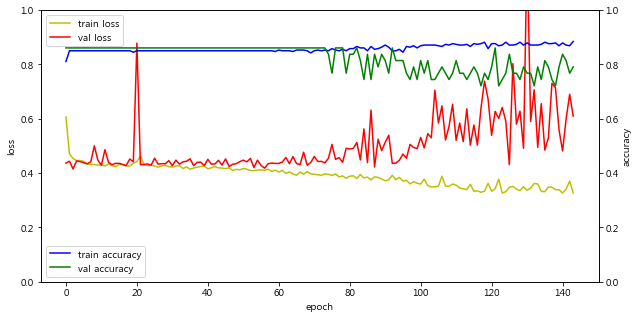

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

acc_ax = loss_ax.twinx()  # 오른쪽 y 출 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 1.0]) # 값을 반영하여 변경

# 오른쪽 y 축 설정
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylim([0.0, 1.0])

# 축 레이블 설정
loss_ax.set_xlabel('epoch' )  # 학습 횟수
loss_ax.set_ylabel('loss')    # 왼쪽 y 축 레이블, 오차
acc_ax.set_ylabel('accuracy') # 오른쪽 y 축 레이블,정확도

loss_ax.legend(loc='upper left') # 왼쪽 y 축 오차 레이블 위치
acc_ax.legend(loc='lower left')  # 오른쪽 y 축 정확도 레이블 위치

plt.show()

In [23]:
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=1, verbose=0)
print('손실값:', test_loss, '/정확도:', (test_acc*100), '%')

손실값: 0.7110672256251485 /정확도: 80.85106611251831 %


In [24]:
model.save('./CancerSurvival.h5')